In [1]:
import dask
import dask.dataframe as dd
from dask import delayed
from dask.distributed import Client, wait

In [2]:
client = Client()

client

/usr/tce/packages/python/python-3.7.2/lib/python3.7/contextlib.py:119: UserWarning: Creating scratch directories is taking a surprisingly long time. This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 6
Total threads: 36,Total memory: 125.50 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:39226,Workers: 6
Dashboard: http://127.0.0.1:8787/status,Total threads: 36
Started: Just now,Total memory: 125.50 GiB
Comm: tcp://127.0.0.1:34258,Total threads: 6
Dashboard: http://127.0.0.1:39907/status,Memory: 20.92 GiB
Nanny: tcp://127.0.0.1:39775,


In [10]:
log_dir = "/usr/workspace/iopp/vani_app_logs/cm1/nodes-32/workflow-4/_parquet"

ddf = dd.read_parquet(f"{log_dir}/*.parquet")

ddf

,index,proc,rank,thread_id,cat,io_cat,tstart,tend,func_id,level,hostname,app,filename,size,bandwidth,duration,tmid,file_id,proc_id
npartitions=1,,,,,,,,,,,,,,,,,,,
,int64,int64,int32,int32,int32,int32,float32,float32,object,int32,object,object,object,int64,float32,float32,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
ddf.head()

,index,proc,rank,thread_id,cat,io_cat,tstart,tend,func_id,level,hostname,app,filename,size,bandwidth,duration,tmid,file_id,proc_id
0,1,1,0,322192,0,3,2.823260,2.823267,__xstat,0,localhost,app1,,0,0.00,0.000007,28232634,6142509188972423790,5117778030848174740
1,2,1,0,322192,0,3,2.823293,2.823305,open,0,localhost,app1,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0,0.00,0.000012,28232988,4531734244992817467,5117778030848174740
2,3,1,0,322192,0,3,2.823371,2.823373,__fxstat,0,localhost,app1,,0,0.00,0.000002,28233717,6142509188972423790,5117778030848174740
3,4,1,0,322192,0,1,2.823390,2.823399,read,0,localhost,app1,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,16777216,1758241.75,0.000009,28233943,4531734244992817467,5117778030848174740
4,5,1,0,322192,0,3,2.823490,2.823494,close,0,localhost,app1,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0,0.00,0.000004,28234916,4531734244992817467,5117778030848174740


In [12]:
ddf2 = ddf.set_index(["file_id"])

ddf2

,index,proc,rank,thread_id,cat,io_cat,tstart,tend,func_id,level,hostname,app,filename,size,bandwidth,duration,tmid,proc_id
npartitions=1,,,,,,,,,,,,,,,,,,
-9210576409139474804,int64,int64,int32,int32,int32,int32,float32,float32,object,int32,object,object,object,int64,float32,float32,int64,int64
9214005169356689175,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
ddf2.head()

,index,proc,rank,thread_id,cat,io_cat,tstart,tend,func_id,level,hostname,app,filename,size,bandwidth,duration,tmid,proc_id
file_id,,,,,,,,,,,,,,,,,,
-9210576409139474804,10917,1,0,322192,0,3,488.504364,488.505005,open,0,localhost,app1,cm1out_diag_000263_w.dat,0,0.0,0.000643,4885046872,5117778030848174740
-9168195151421661530,14347,1,0,322192,0,3,642.497131,642.497314,open,0,localhost,app1,cm1out_diag_000347_w.dat,0,0.0,0.000190,6424972234,5117778030848174740
-9158209689273753013,8003,1,0,322192,0,3,363.560333,363.561249,open,0,localhost,app1,cm1out_diag_000192_s.dat,0,0.0,0.000943,3635607921,5117778030848174740
-9156229427400794807,11393,1,0,322192,0,3,509.827484,509.828308,open,0,localhost,app1,cm1out_diag_000275_s.dat,0,0.0,0.000820,5098278931,5117778030848174740
-9152111020125043934,12787,1,0,322192,0,3,573.510864,573.511475,open,0,localhost,app1,cm1out_diag_000308_w.dat,0,0.0,0.000576,5735111618,5117778030848174740


In [14]:
ddf3 = ddf2.persist()

ddf3

,index,proc,rank,thread_id,cat,io_cat,tstart,tend,func_id,level,hostname,app,filename,size,bandwidth,duration,tmid,proc_id
npartitions=1,,,,,,,,,,,,,,,,,,
-9210576409139474804,int64,int64,int32,int32,int32,int32,float32,float32,object,int32,object,object,object,int64,float32,float32,int64,int64
9214005169356689175,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [15]:
wait(ddf3)

DoneAndNotDoneFutures(done={<Future: finished, type: pandas.core.frame.DataFrame, key: ('sort_index-1687454b354341af9ecd3f44e9224eca', 0)>}, not_done=set())

In [16]:
import json
import math

def compute_min_max(log_dir: str, fg_index: str, depth: int):
    with open(f"{log_dir}/global.json") as file:
        global_metrics = json.load(file)
        min_val, max_val = global_metrics[fg_index][0], global_metrics[fg_index][1]
        next_tasks = 2 ** depth
        interval = math.ceil((max_val - min_val) * 1.0 / next_tasks)
        time_range = range(min_val, max_val, interval)
        return interval, time_range

interval, time_range = compute_min_max(log_dir=log_dir, fg_index="file_id", depth=10)

interval, time_range

(17992755447750160,
 range(-9210576409139474804, 9214005169356689175, 17992755447750160))

In [47]:
import os
from dask import delayed
from dask.dataframe import DataFrame

PARTITION_DIR = "partitioned"

@delayed
def read_parquet_delayed(log_dir: str, index=False):
    print("read_parquet_delayed")
    return dd.read_parquet(f"{log_dir}/*.parquet", index=index)

@delayed
def set_index_delayed(ddf: DataFrame, fg_index: str):
    print("set_index_delayed")
    return ddf.set_index([fg_index])

@delayed
def persist_delayed(ddf: DataFrame):
    print("persist_delayed")
    return ddf.persist()

def read_partitioned_parquet(log_dir: str, fg_index: str, index=False, repartition_size="128MB"):
    delays = []
    is_partitioned = os.path.exists(f"{log_dir}/{PARTITION_DIR}/{fg_index}/_common_metadata")
    
    ddf_delayed = read_parquet_delayed(log_dir=log_dir, index=index, dask_key_name=f"read_parquet_delayed_{fg_index}")
    delays.append(ddf_delayed)
    index_delayed = set_index_delayed(ddf=ddf_delayed, fg_index=fg_index, dask_key_name=f"set_index_delayed_{fg_index}")
    delays.append(index_delayed)
    persisted_delayed = persist_delayed(ddf=index_delayed) #, dask_key_name=f"persist_delayed_{fg_index}")
    delays.append(persisted_delayed)
    
    return persisted_delayed

delays = read_partitioned_parquet(log_dir, "file_id")

delays

Delayed('persist_delayed-acd2937e-2d24-492d-895a-ce9efd295080')

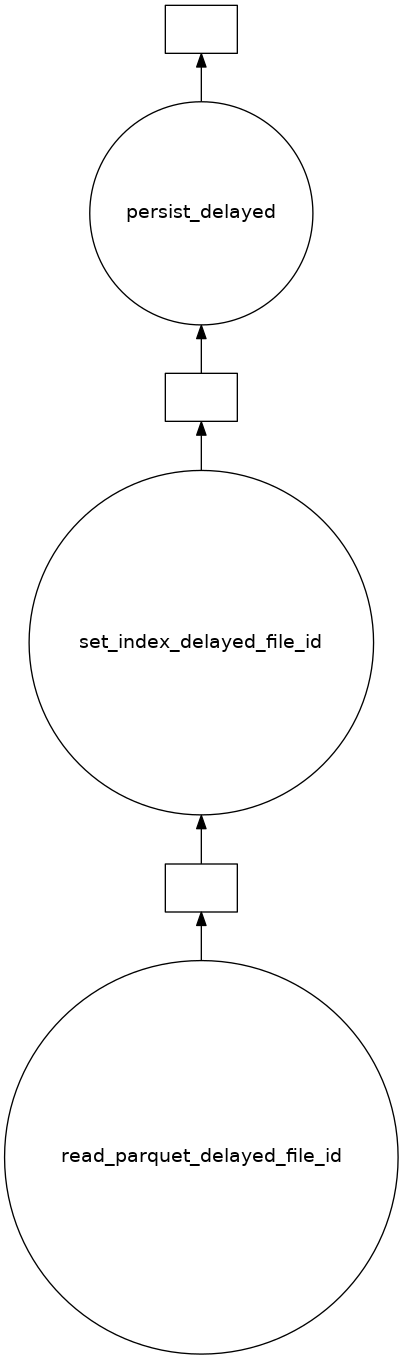

In [48]:
dask.delayed(delays).visualize()

In [49]:
res = client.compute(delays)

res

persist_delayed


<Future: pending, key: persist_delayed-acd2937e-2d24-492d-895a-ce9efd295080>

In [51]:
res

<Future: finished, type: dask.dataframe.core.DataFrame, key: persist_delayed-acd2937e-2d24-492d-895a-ce9efd295080>

In [52]:
res.result()

,index,proc,rank,thread_id,cat,io_cat,tstart,tend,func_id,level,hostname,app,filename,size,bandwidth,duration,tmid,proc_id
npartitions=1,,,,,,,,,,,,,,,,,,
-9210576409139474804,int64,int64,int32,int32,int32,int32,float32,float32,object,int32,object,object,object,int64,float32,float32,int64,int64
9214005169356689175,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [28]:
ddf

<function __main__.persist_delayed(ddf: dask.dataframe.core.DataFrame)>

AttributeError: 'function' object has no attribute 'head'